# Compare annotators across the Kumar and MHS datasets

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datasets

In [179]:
KUMAR_TRAINING_DATA_SUBSAMPLED_PATH = '/data1/moscato/personalised-hate-boundaries-data/models/sepheads_model_training_test_subsampling_2/training_data_subsampled.csv'
KUMAR_TEST_DATA_SUBSAMPLED_PATH = '/data1/moscato/personalised-hate-boundaries-data/models/sepheads_model_training_test_subsampling_2/test_data_subsampled.csv'
KUMAR_ANNOTATORS_DATA_PATH = '/data1/moscato/personalised-hate-boundaries-data/data/kumar_perspective_clean/annotators_data.csv'

# Data used for the original training.
# MHS_TRAINING_DATA_PATH = '/data1/moscato/personalised-hate-boundaries-data/data/measuring_hate_speech_data_clean/mhs_clean_train.csv'
# MHS_TEST_DATA_PATH = '/data1/moscato/personalised-hate-boundaries-data/data/measuring_hate_speech_data_clean/mhs_clean_test.csv'
# MHS_ANNOTATORS_DATA_PATH = '/data1/moscato/personalised-hate-boundaries-data/data/measuring_hate_speech_data_clean/annotators_data_mhs.csv'
# New data with more samples (10 samples per annotator).
MHS_TRAINING_DATA_PATH = '/data1/moscato/personalised-hate-boundaries-data/data/measuring_hate_speech_data_clean/mhs_clean_train_10_samples_per_annotator.csv'
MHS_TEST_DATA_PATH = '/data1/moscato/personalised-hate-boundaries-data/data/measuring_hate_speech_data_clean/mhs_clean_test_10_samples_per_annotator.csv'
MHS_ANNOTATORS_DATA_PATH = '/data1/moscato/personalised-hate-boundaries-data/data/measuring_hate_speech_data_clean/annotators_data_mhs_10_samples_per_annotator.csv'

Kumar.

In [10]:
kumar_training_data = pd.read_csv(KUMAR_TRAINING_DATA_SUBSAMPLED_PATH)
kumar_test_data = pd.read_csv(KUMAR_TEST_DATA_SUBSAMPLED_PATH)
kumar_annotators_data = pd.read_csv(KUMAR_ANNOTATORS_DATA_PATH)

kumar_all_data = pd.concat([kumar_training_data, kumar_test_data]).reset_index(drop=True)

kumar_all_data = pd.merge(
    left=kumar_all_data,
    right=kumar_annotators_data,
    how='left',
    on='annotator_id'
)

In [16]:
kumar_training_data['annotator_id'].unique().shape, kumar_test_data['annotator_id'].unique().shape, kumar_all_data['annotator_id'].unique().shape

((2883,), (2883,), (2883,))

In [44]:
kumar_annotators_stats = kumar_all_data.groupby('annotator_id').agg(
    extreme_annotator=pd.NamedAgg('extreme_annotator', 'first'),
    n_annotations=pd.NamedAgg('text_id', 'count'),
    n_annotations_hate=pd.NamedAgg('toxic_score', 'sum'),
    n_annotations_non_hate=pd.NamedAgg('toxic_score', lambda g: (g == 0).sum())
).reset_index()

kumar_annotators_stats['frac_annotations_non_hate'] = kumar_annotators_stats['n_annotations_non_hate'] / kumar_annotators_stats['n_annotations']

kumar_annotators_stats = kumar_annotators_stats.sort_values('frac_annotations_non_hate').reset_index(drop=True)

kumar_annotators_stats

,annotator_id,extreme_annotator,n_annotations,n_annotations_hate,n_annotations_non_hate,frac_annotations_non_hate
0,14084,False,40,40,0,0.0
1,14065,False,40,40,0,0.0
2,12411,False,40,40,0,0.0
3,14144,False,60,60,0,0.0
4,11229,False,40,40,0,0.0
...,...,...,...,...,...,...
2878,633,True,20,0,20,1.0
2879,6238,True,20,0,20,1.0
2880,14263,True,20,0,20,1.0
2881,4158,True,20,0,20,1.0


<Axes: xlabel='None', ylabel='frac_annotations_non_hate'>

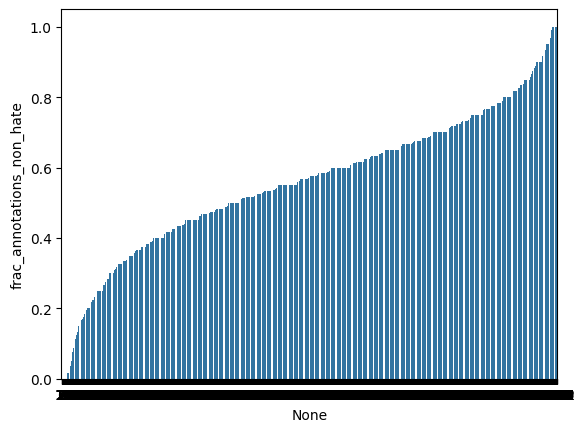

In [45]:
sns.barplot(
    x=kumar_annotators_stats.index,#['annotator_id'].astype(str),
    y=kumar_annotators_stats['frac_annotations_non_hate']
)

<Axes: xlabel='None', ylabel='frac_annotations_non_hate'>

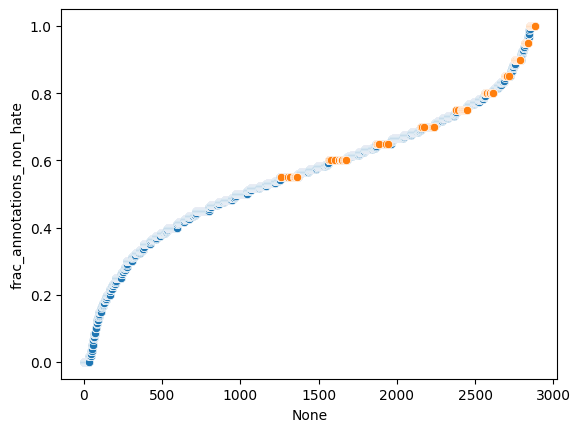

In [46]:
sns.scatterplot(
    x=kumar_annotators_stats[~kumar_annotators_stats['extreme_annotator']].index,#['annotator_id'].astype(str),
    y=kumar_annotators_stats[~kumar_annotators_stats['extreme_annotator']]['frac_annotations_non_hate'],
    color=sns.color_palette()[0]
)

sns.scatterplot(
    x=kumar_annotators_stats[kumar_annotators_stats['extreme_annotator']].index,#['annotator_id'].astype(str),
    y=kumar_annotators_stats[kumar_annotators_stats['extreme_annotator']]['frac_annotations_non_hate'],
    color=sns.color_palette()[1]
)

In [59]:
kumar_annotators_stats

,annotator_id,extreme_annotator,n_annotations,n_annotations_hate,n_annotations_non_hate,frac_annotations_non_hate
0,14084,False,40,40,0,0.0
1,14065,False,40,40,0,0.0
2,12411,False,40,40,0,0.0
3,14144,False,60,60,0,0.0
4,11229,False,40,40,0,0.0
...,...,...,...,...,...,...
2878,633,True,20,0,20,1.0
2879,6238,True,20,0,20,1.0
2880,14263,True,20,0,20,1.0
2881,4158,True,20,0,20,1.0


MHS data.

In [213]:
mhs_training_data = pd.read_csv(MHS_TRAINING_DATA_PATH)
mhs_test_data = pd.read_csv(MHS_TEST_DATA_PATH)
mhs_annotators_data = pd.read_csv(MHS_ANNOTATORS_DATA_PATH)

mhs_all_data = pd.concat([mhs_training_data, mhs_test_data]).reset_index(drop=True)

# mhs_all_data = pd.merge(
#     left=mhs_all_data,
#     right=mhs_annotators_data,
#     how='left',
#     on='annotator_id'
# )

mhs_all_data = pd.merge(
    left=mhs_all_data,
    right=datasets.load_dataset('ucberkeley-dlab/measuring-hate-speech', 'default')['train'].to_pandas().rename(columns={'comment_id': 'text_id'}).drop(columns=['text', 'hatespeech']),
    how='left',
    on=['text_id', 'annotator_id']
)

mhs_annotators_data['extreme_annotator_quantile_95'] = mhs_annotators_data['annotator_severity_quantile'] >= 0.95
mhs_annotators_data['extreme_annotator_quantile_97'] = mhs_annotators_data['annotator_severity_quantile'] >= 0.97

mhs_all_data = pd.merge(
    left=mhs_all_data,
    right=mhs_annotators_data[['annotator_id', 'extreme_annotator_quantile_95', 'extreme_annotator_quantile_97']],
    how='left',
    on='annotator_id'
)

In [234]:
mhs_annotators_data.shape

(3406, 8)

In [214]:
mhs_annotators_data[['extreme_annotator', 'extreme_annotator_quantile_95', 'extreme_annotator_quantile_97']].sum()

extreme_annotator                342
extreme_annotator_quantile_95    175
extreme_annotator_quantile_97    110
dtype: int64

In [216]:
mhs_annotators_stats = mhs_all_data.groupby('annotator_id').agg(
    extreme_annotator=pd.NamedAgg('extreme_annotator', 'first'),
    extreme_annotator_quantile_95=pd.NamedAgg('extreme_annotator_quantile_95', 'first'),
    extreme_annotator_quantile_97=pd.NamedAgg('extreme_annotator_quantile_97', 'first'),
    n_annotations=pd.NamedAgg('text_id', 'count'),
    n_annotations_hate=pd.NamedAgg('toxic_score', 'sum'),
    n_annotations_non_hate=pd.NamedAgg('toxic_score', lambda g: (g == 0).sum())
).reset_index()

mhs_annotators_stats['frac_annotations_non_hate'] = mhs_annotators_stats['n_annotations_non_hate'] / mhs_annotators_stats['n_annotations']

mhs_annotators_stats = mhs_annotators_stats.sort_values('frac_annotations_non_hate').reset_index(drop=True)

mhs_annotators_stats

,annotator_id,extreme_annotator,extreme_annotator_quantile_95,extreme_annotator_quantile_97,n_annotations,n_annotations_hate,n_annotations_non_hate,frac_annotations_non_hate
0,5715,False,False,False,10,10,0,0.000000
1,1815,False,False,False,10,9,1,0.100000
2,6291,False,False,False,10,9,1,0.100000
3,7292,False,False,False,14,12,2,0.142857
4,4687,False,False,False,14,12,2,0.142857
...,...,...,...,...,...,...,...,...
2214,2465,True,True,False,11,0,11,1.000000
2215,6762,False,False,False,13,0,13,1.000000
2216,5929,True,False,False,12,0,12,1.000000
2217,4821,True,True,False,19,0,19,1.000000


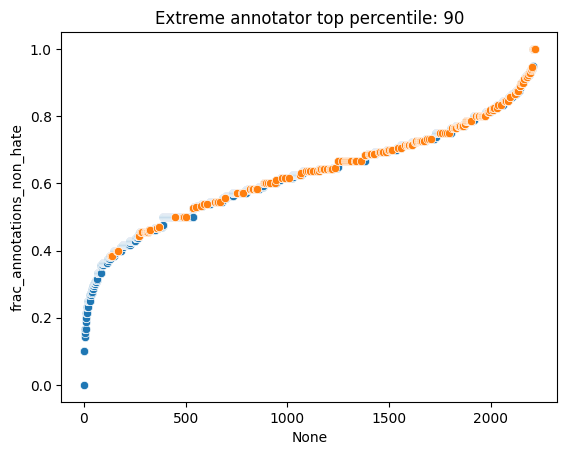

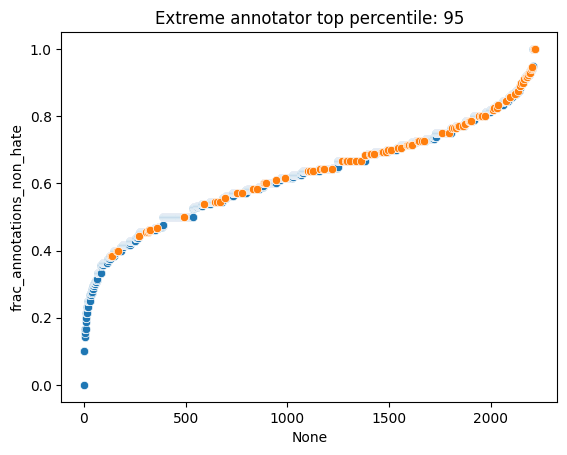

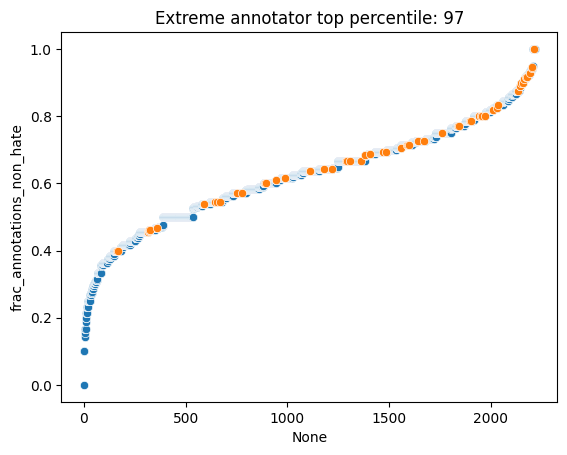

In [220]:
for extreme_annotator_col in ['extreme_annotator', 'extreme_annotator_quantile_95', 'extreme_annotator_quantile_97']:
    plt.figure()
    
    sns.scatterplot(
        x=mhs_annotators_stats[~mhs_annotators_stats[extreme_annotator_col]].index,#['annotator_id'].astype(str),
        y=mhs_annotators_stats[~mhs_annotators_stats[extreme_annotator_col]]['frac_annotations_non_hate'],
        color=sns.color_palette()[0]
    )
    
    sns.scatterplot(
        x=mhs_annotators_stats[mhs_annotators_stats[extreme_annotator_col]].index,#['annotator_id'].astype(str),
        y=mhs_annotators_stats[mhs_annotators_stats[extreme_annotator_col]]['frac_annotations_non_hate'],
        color=sns.color_palette()[1]
    )

    if extreme_annotator_col == 'extreme_annotator':
        plt.title(f'Extreme annotator top percentile: 90')
    else:
        plt.title(f'Extreme annotator top percentile: {extreme_annotator_col.split("_")[-1]}')

Boxplot comparison.

In [231]:
mhs_annotators_stats

,annotator_id,extreme_annotator,extreme_annotator_quantile_95,extreme_annotator_quantile_97,n_annotations,n_annotations_hate,n_annotations_non_hate,frac_annotations_non_hate
0,5715,False,False,False,10,10,0,0.000000
1,1815,False,False,False,10,9,1,0.100000
2,6291,False,False,False,10,9,1,0.100000
3,7292,False,False,False,14,12,2,0.142857
4,4687,False,False,False,14,12,2,0.142857
...,...,...,...,...,...,...,...,...
2214,2465,True,True,False,11,0,11,1.000000
2215,6762,False,False,False,13,0,13,1.000000
2216,5929,True,False,False,12,0,12,1.000000
2217,4821,True,True,False,19,0,19,1.000000


<Axes: xlabel='extreme_annotators_top_percentile', ylabel='diff_of_means'>

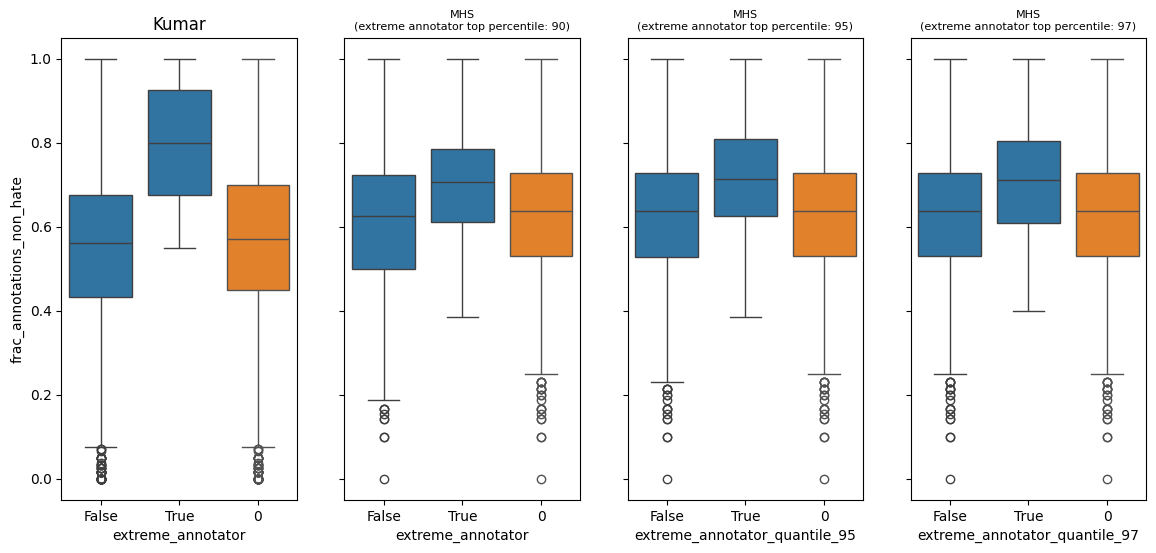

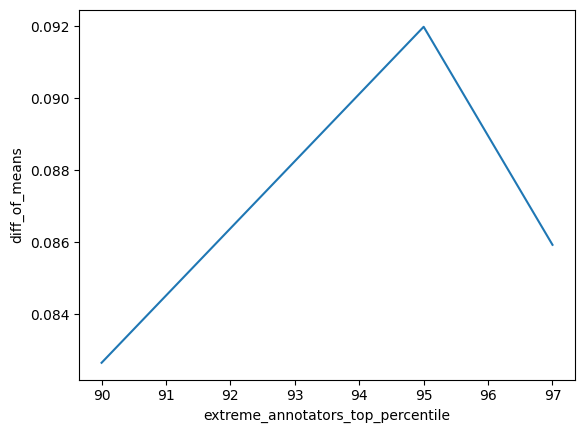

In [233]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(14, 6), sharey=True)

sns.boxplot(
    x=kumar_annotators_stats['extreme_annotator'],
    y=kumar_annotators_stats['frac_annotations_non_hate'],
    ax=axs[0]
)

sns.boxplot(
    x=[0] * len(kumar_annotators_stats),
    y=kumar_annotators_stats['frac_annotations_non_hate'],
    ax=axs[0]
)

plt.sca(axs[0])

plt.title('Kumar')

# plt.axhline(
#     y=kumar_annotators_stats['frac_annotations_non_hate'].median(),
#     color=sns.color_palette()[1],
#     label='Dataset median'
# )

# plt.legend()

diff_of_means = []

for i, extreme_annotator_col in enumerate(['extreme_annotator', 'extreme_annotator_quantile_95', 'extreme_annotator_quantile_97']):
    extreme_annotators_top_percentile = 90 if extreme_annotator_col == 'extreme_annotator' else int(extreme_annotator_col.split("_")[-1])
    
    sns.boxplot(
        x=mhs_annotators_stats[extreme_annotator_col],
        y=mhs_annotators_stats['frac_annotations_non_hate'],
        ax=axs[i+1]
    )
    
    sns.boxplot(
        x=[0] * len(mhs_annotators_stats),
        y=mhs_annotators_stats['frac_annotations_non_hate'],
        ax=axs[i+1]
    )
    
    plt.sca(axs[i+1])

    plt.title(f'MHS\n(extreme annotator top percentile: {extreme_annotators_top_percentile})', fontsize=8)

    
    # plt.axhline(
    #     y=mhs_annotators_stats['frac_annotations_non_hate'].median(),
    #     color=sns.color_palette()[1],
    #     label='Dataset median'
    # )
    
    # plt.legend(loc='lower right')

    diff_of_means.append(
        {
            'extreme_annotators_top_percentile': extreme_annotators_top_percentile,
            'diff_of_means': (
                mhs_annotators_stats[mhs_annotators_stats[extreme_annotator_col]]['frac_annotations_non_hate'].mean()
                - mhs_annotators_stats[~mhs_annotators_stats[extreme_annotator_col]]['frac_annotations_non_hate'].mean()
            )
        }
    )

diff_of_means = pd.DataFrame(diff_of_means)

plt.figure()

sns.lineplot(
    x=diff_of_means['extreme_annotators_top_percentile'],
    y=diff_of_means['diff_of_means']
)

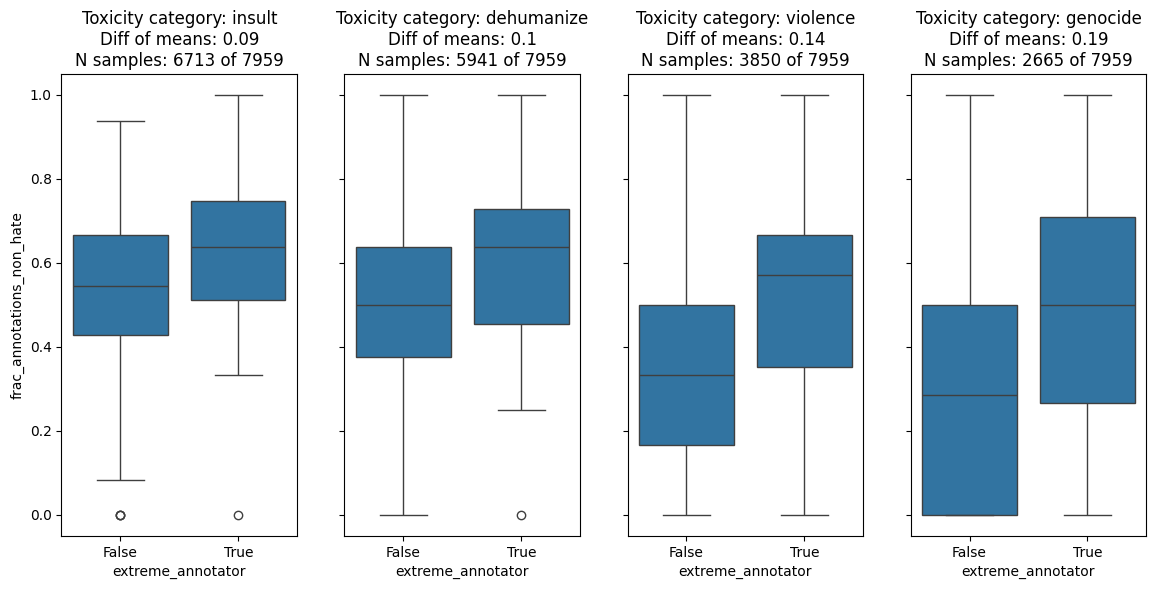

In [171]:
categories = ['insult', 'dehumanize', 'violence', 'genocide']

fig, axs = plt.subplots(ncols=len(categories), nrows=1, figsize=(14, 6), sharey=True)

for i, toxicity_cat in enumerate(categories):
    # Subset "binarizing" the category score.
    sub_dataset = mhs_all_data[mhs_all_data[toxicity_cat] > 0].reset_index(drop=True)

    n_samples_category = len(sub_dataset)

    sub_dataset = sub_dataset.groupby('annotator_id').agg(
        extreme_annotator=pd.NamedAgg('extreme_annotator', 'first'),
        n_annotations=pd.NamedAgg('text_id', 'count'),
        n_annotations_hate=pd.NamedAgg('toxic_score', 'sum'),
        n_annotations_non_hate=pd.NamedAgg('toxic_score', lambda g: (g == 0).sum())
    ).reset_index()
    
    sub_dataset['frac_annotations_non_hate'] = sub_dataset['n_annotations_non_hate'] / sub_dataset['n_annotations']
    
    sns.boxplot(
        x=sub_dataset['extreme_annotator'],
        y=sub_dataset['frac_annotations_non_hate'],
        ax=axs[i]
    )

    plt.sca(axs[i])

    mean_non_extreme = sub_dataset[~sub_dataset['extreme_annotator']]['frac_annotations_non_hate'].mean()
    mean_extreme = sub_dataset[sub_dataset['extreme_annotator']]['frac_annotations_non_hate'].mean()
    
    plt.title(
        f'Toxicity category: {toxicity_cat}'
        f'\nDiff of means: {round(mean_extreme - mean_non_extreme, 2)}'
        f'\nN samples: {n_samples_category} of {len(mhs_all_data)}'
    )

Text(0.5, 1.0, 'Difference between mean fraction of non-hateful annotations across categories')

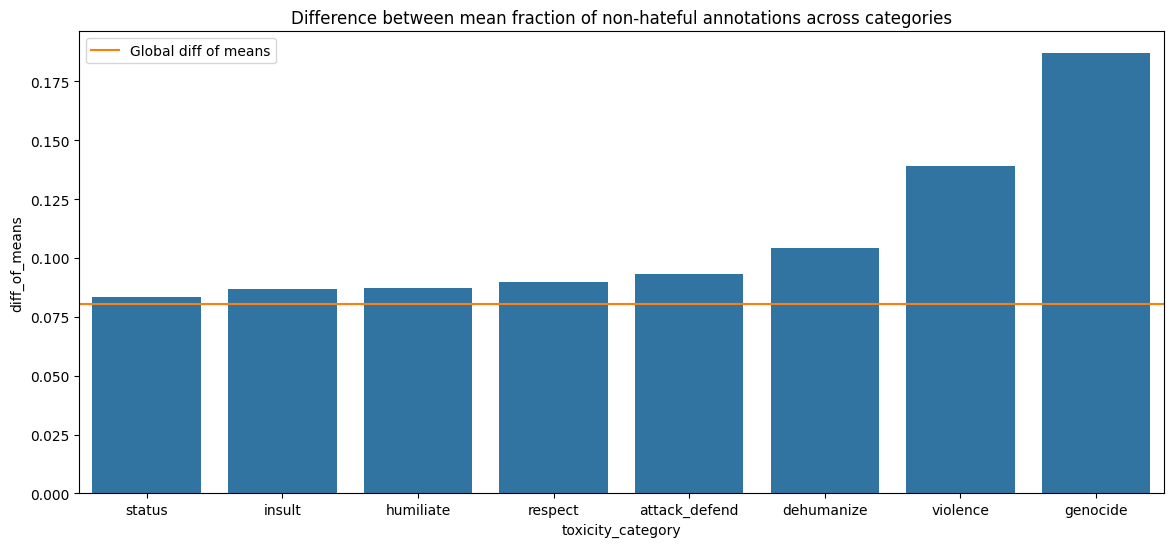

In [168]:
categories = [
    'respect',
    'insult',
    'humiliate',
    'status',
    'dehumanize',
    'violence',
    'genocide',
    'attack_defend'
]

diff_mean_cat = []

for i, toxicity_cat in enumerate(categories):
    # Subset "binarizing" the category score.
    sub_dataset = mhs_all_data[mhs_all_data[toxicity_cat] > 0].reset_index(drop=True)

    sub_dataset = sub_dataset.groupby('annotator_id').agg(
        extreme_annotator=pd.NamedAgg('extreme_annotator', 'first'),
        n_annotations=pd.NamedAgg('text_id', 'count'),
        n_annotations_hate=pd.NamedAgg('toxic_score', 'sum'),
        n_annotations_non_hate=pd.NamedAgg('toxic_score', lambda g: (g == 0).sum())
    ).reset_index()
    
    sub_dataset['frac_annotations_non_hate'] = sub_dataset['n_annotations_non_hate'] / sub_dataset['n_annotations']

    mean_non_extreme = sub_dataset[~sub_dataset['extreme_annotator']]['frac_annotations_non_hate'].mean()
    mean_extreme = sub_dataset[sub_dataset['extreme_annotator']]['frac_annotations_non_hate'].mean()

    diff_mean_cat.append({
        'toxicity_category': toxicity_cat,
        'diff_of_means': mean_extreme - mean_non_extreme
    })

diff_mean_cat = pd.DataFrame(diff_mean_cat).sort_values('diff_of_means').reset_index(drop=True)


plt.figure(figsize=(14, 6))

sns.barplot(
    x=diff_mean_cat['toxicity_category'],
    y=diff_mean_cat['diff_of_means'],
    color=sns.color_palette()[0]
)

mean_non_extreme_global = mhs_annotators_stats[~mhs_annotators_stats['extreme_annotator']]['frac_annotations_non_hate'].mean()
mean_extreme_global = mhs_annotators_stats[mhs_annotators_stats['extreme_annotator']]['frac_annotations_non_hate'].mean()

plt.axhline(
    y=mean_extreme_global - mean_non_extreme_global,
    label='Global diff of means',
    color=sns.color_palette()[1]
)

plt.legend()
plt.title('Difference between mean fraction of non-hateful annotations across categories')